In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**Importing the dataset**

In [2]:
df=pd.read_csv("Social_Network_Ads.csv")

In [5]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


**Splitting the dataset into the Training set and Test set**

In [6]:
df.Gender.replace("Female",0,inplace=True)
df.Gender.replace("Male",1,inplace=True)
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [7]:
X=df.drop(["Purchased"],axis=1)
Y=df["Purchased"]
Y=np.array(Y).reshape(-1,1)
Y.shape

(400, 1)

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=0.3,random_state=577)

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

**Feature Scaling**

**Fitting Random Forest to the Training set**

In [16]:
model=RandomForestClassifier()
model.fit(x_train,y_train) #Input,Output pair to train your model

/var/folders/mz/69ry24wj6p17r45gmjms3lqr0000gn/T/ipykernel_6702/3003848074.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train,y_train) #Input,Output pair to train your model


RandomForestClassifier()

In [18]:
test_preds=model.predict(x_test)
test_preds

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0])

In [20]:
model.feature_importances_

array([0.12526807, 0.0155252 , 0.49053575, 0.36867098])

**Predicting the Test set results**

In [21]:
model.predict_proba(x_test)

array([[0.97, 0.03],
       [0.97, 0.03],
       [0.99, 0.01],
       [0.22, 0.78],
       [0.98, 0.02],
       [0.02, 0.98],
       [0.97, 0.03],
       [0.96, 0.04],
       [0.26, 0.74],
       [0.38, 0.62],
       [1.  , 0.  ],
       [0.07, 0.93],
       [0.99, 0.01],
       [0.98, 0.02],
       [1.  , 0.  ],
       [0.92, 0.08],
       [0.99, 0.01],
       [0.07, 0.93],
       [0.89, 0.11],
       [0.98, 0.02],
       [0.89, 0.11],
       [0.99, 0.01],
       [0.26, 0.74],
       [1.  , 0.  ],
       [0.11, 0.89],
       [0.16, 0.84],
       [0.96, 0.04],
       [0.84, 0.16],
       [0.63, 0.37],
       [0.98, 0.02],
       [0.72, 0.28],
       [0.06, 0.94],
       [0.02, 0.98],
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.98, 0.02],
       [0.2 , 0.8 ],
       [0.19, 0.81],
       [0.98, 0.02],
       [0.59, 0.41],
       [0.97, 0.03],
       [1.  , 0.  ],
       [0.93, 0.07],
       [0.07, 0.93],
       [1.  , 0.  ],
       [1.  ,

**Making the Confusion Matrix**

In [22]:
from sklearn import metrics
confusion_matrix_train = metrics.confusion_matrix(y_train,model.predict(x_train))
confusion_matrix_train

array([[176,   0],
       [  0, 104]])

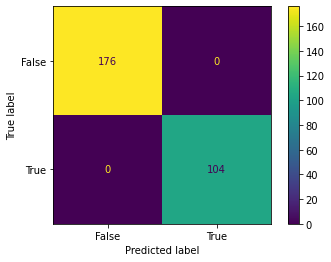

In [23]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_train, display_labels = [False, True])
cm_display.plot()
plt.show()

In [25]:
from sklearn import metrics
confusion_matrix_test = metrics.confusion_matrix(y_test,model.predict(x_test))
confusion_matrix_test

array([[73,  8],
       [ 4, 35]])

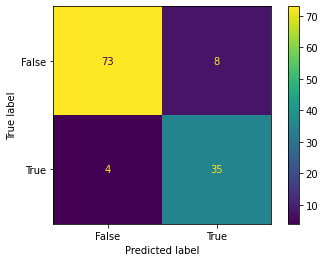

In [26]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_test, display_labels = [False, True])
cm_display.plot()
plt.show()

**Visualising the Training set results**

In [27]:
from sklearn.tree import plot_tree

In [28]:
x_tr_small=x_train[0:40]
y_tr_small=y_train[0:40]

In [29]:
clf=model.fit(x_tr_small,y_tr_small)

/var/folders/mz/69ry24wj6p17r45gmjms3lqr0000gn/T/ipykernel_6702/2417030930.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf=model.fit(x_tr_small,y_tr_small)


[Text(334.8, 498.3, 'Purchased <= 24500.0\ngini = 0.495\nsamples = 24\nvalue = [22, 18]'),
 Text(251.10000000000002, 407.70000000000005, 'gini = 0.0\nsamples = 3\nvalue = [8, 0]'),
 Text(418.5, 407.70000000000005, 'Estimated Salary <= 43.5\ngini = 0.492\nsamples = 21\nvalue = [14, 18]'),
 Text(167.4, 317.1, 'Age <= 15732424.5\ngini = 0.401\nsamples = 15\nvalue = [13, 5]'),
 Text(83.7, 226.5, 'gini = 0.0\nsamples = 9\nvalue = [10, 0]'),
 Text(251.10000000000002, 226.5, 'Purchased <= 68000.0\ngini = 0.469\nsamples = 6\nvalue = [3, 5]'),
 Text(167.4, 135.89999999999998, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(334.8, 135.89999999999998, 'Estimated Salary <= 31.5\ngini = 0.278\nsamples = 4\nvalue = [1, 5]'),
 Text(251.10000000000002, 45.299999999999955, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(418.5, 45.299999999999955, 'gini = 0.0\nsamples = 3\nvalue = [0, 5]'),
 Text(669.6, 317.1, 'Gender <= 0.5\ngini = 0.133\nsamples = 6\nvalue = [1, 13]'),
 Text(585.9, 226.5, 'Estimat

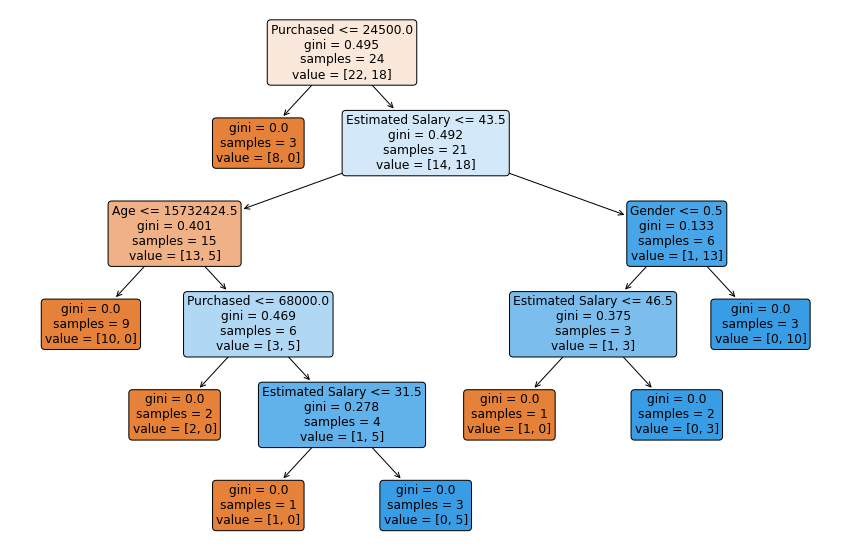

In [32]:

fig = plt.figure(figsize=(15, 10))
plot_tree(model.estimators_[0], 
          feature_names=["Age","Gender","Estimated Salary","Purchased"], 
          filled=True, impurity=True, 
          rounded=True)

**Visualising the Test set results**